In [1]:
import requests
import os
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from config import weather_api_key as api_key

In [2]:
url= "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
city_data = []
print('Beginning Data Retrieval           ')
print('-----------------------------------')

record_count = 1
set_count = 1

Beginning Data Retrieval           
-----------------------------------


In [4]:
lats = np.random.uniform(low = -90.000, high = 90.000, size = 2000)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 2000)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)
coordinates

[(-77.17664529112955, 176.30861689660406),
 (-60.07205963641974, -170.1670257584886),
 (-77.79417459893958, -139.63273030294397),
 (39.638325795169976, -142.74517115526334),
 (-85.90653183417683, -4.641834302975923),
 (-78.37203069796307, -91.86743082843209),
 (73.49327607471818, 175.77538318331335),
 (30.54992870780319, 162.11828743038137),
 (68.13663070426725, 25.745938448551954),
 (1.1382532375415195, -59.3079426807342),
 (-15.733046730083203, 128.86421412750775),
 (-1.0635486258379103, 178.48591616499778),
 (-67.54852395750333, 179.66159463492534),
 (13.661966354255298, -83.3586048337332),
 (39.62443098507842, -62.56712653142311),
 (-2.9344703440279005, -87.25367392605595),
 (-88.92791842862606, -26.80503606246515),
 (-40.72675264611617, 37.60086908661151),
 (-17.525498506114545, -178.4429459119176),
 (16.423702412773224, 82.52200656901891),
 (-79.5606931422663, -98.3346113281021),
 (-58.57309676497103, 66.3234904386471),
 (-77.75977809715529, 45.40245189932935),
 (48.9071949345592

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

768

In [6]:
# Loop through all the cities in our list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    params = {
        "appid": api_key,
        "q": city.replace(" ", "+"),
        "units":"imperial"
        }
    city_url = url #+ "appid=" + api_key + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url, params=params).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | karasjok
Processing Record 10 of Set 1 | bonfim
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | rungata
City not found. Skipping...
Processing Record 13 of Set 1 | puerto cabezas
City not found. Skipping...
Processing Record 14 of Set 1 | liverpool
Processing Record 15 of Set 1 | san cristobal
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 1 | neiafu
Processing Record 19 of Set 1 | yanam
Processing Record 20 of Set 1 | saint-philippe


Processing Record 18 of Set 4 | tocopilla
Processing Record 19 of Set 4 | caconda
Processing Record 20 of Set 4 | olinda
Processing Record 21 of Set 4 | virginia beach
City not found. Skipping...
Processing Record 22 of Set 4 | vallenar
Processing Record 23 of Set 4 | bethel
Processing Record 24 of Set 4 | galveston
Processing Record 25 of Set 4 | bataipora
Processing Record 26 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 4 | faanui
Processing Record 28 of Set 4 | mahebourg
Processing Record 29 of Set 4 | olbia
Processing Record 30 of Set 4 | ilulissat
Processing Record 31 of Set 4 | bogande
Processing Record 32 of Set 4 | kemijarvi
Processing Record 33 of Set 4 | mahendranagar
Processing Record 34 of Set 4 | ambulu
Processing Record 35 of Set 4 | ponta do sol
City not found. Skipping...
Processing Record 36 of Set 4 | cairns
Processing Record 37 of Set 4 | diu
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | chiang klang
City not fou

Processing Record 35 of Set 7 | tabiauea
City not found. Skipping...
Processing Record 36 of Set 7 | tanout
Processing Record 37 of Set 7 | luebo
Processing Record 38 of Set 7 | san andres
City not found. Skipping...
Processing Record 39 of Set 7 | thilogne
City not found. Skipping...
Processing Record 40 of Set 7 | jiangyou
Processing Record 41 of Set 7 | sorvag
City not found. Skipping...
Processing Record 42 of Set 7 | orange cove
City not found. Skipping...
Processing Record 43 of Set 7 | walvis bay
City not found. Skipping...
Processing Record 44 of Set 7 | chachapoyas
Processing Record 45 of Set 7 | altamira
Processing Record 46 of Set 7 | sokoni
Processing Record 47 of Set 7 | los llanos de aridane
City not found. Skipping...
Processing Record 48 of Set 7 | lichuan
Processing Record 49 of Set 7 | plettenberg bay
City not found. Skipping...
Processing Record 50 of Set 7 | cap malheureux
City not found. Skipping...
Processing Record 1 of Set 8 | saskylakh
Processing Record 2 of Se

City not found. Skipping...
Processing Record 50 of Set 10 | san borja
City not found. Skipping...
Processing Record 1 of Set 11 | ciudad guayana
City not found. Skipping...
Processing Record 2 of Set 11 | kulhudhuffushi
Processing Record 3 of Set 11 | vardo
Processing Record 4 of Set 11 | niagara falls
City not found. Skipping...
Processing Record 5 of Set 11 | canelli
Processing Record 6 of Set 11 | rochester
Processing Record 7 of Set 11 | pasni
Processing Record 8 of Set 11 | bay roberts
City not found. Skipping...
Processing Record 9 of Set 11 | harper
Processing Record 10 of Set 11 | byron bay
City not found. Skipping...
Processing Record 11 of Set 11 | lanxi
Processing Record 12 of Set 11 | lasa
Processing Record 13 of Set 11 | aswan
Processing Record 14 of Set 11 | bandar-e anzali
City not found. Skipping...
Processing Record 15 of Set 11 | margherita
Processing Record 16 of Set 11 | atikokan
Processing Record 17 of Set 11 | burica
City not found. Skipping...
Processing Record 

Processing Record 25 of Set 14 | rocha
Processing Record 26 of Set 14 | bella union
City not found. Skipping...
Processing Record 27 of Set 14 | lundazi
Processing Record 28 of Set 14 | awbari
Processing Record 29 of Set 14 | shimoda
Processing Record 30 of Set 14 | dumraon
Processing Record 31 of Set 14 | port hawkesbury
City not found. Skipping...
Processing Record 32 of Set 14 | inuvik
Processing Record 33 of Set 14 | pingdu
Processing Record 34 of Set 14 | valleyview
Processing Record 35 of Set 14 | santa maria del oro
City not found. Skipping...
Processing Record 36 of Set 14 | noumea
Processing Record 37 of Set 14 | kijang
Processing Record 38 of Set 14 | mo i rana
City not found. Skipping...
Processing Record 39 of Set 14 | gudalur
Processing Record 40 of Set 14 | dubinino
Processing Record 41 of Set 14 | martapura
Processing Record 42 of Set 14 | mariinskiy posad
City not found. Skipping...
Processing Record 43 of Set 14 | baisha
Processing Record 44 of Set 14 | san quintin
Cit

In [7]:
len(city_data)

568

In [8]:
city_data_df = pd.DataFrame(city_data)

In [9]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.28,169.85,55.99,40,58,15.99,NZ,2020-09-06 02:18:24
1,Vaini,-21.20,-175.20,75.20,60,75,12.75,TO,2020-09-06 02:18:36
2,Rikitea,-23.12,-134.97,72.28,81,5,13.58,PF,2020-09-06 02:20:23
3,Fortuna,40.60,-124.16,66.00,77,1,10.29,US,2020-09-06 02:20:23
4,Hermanus,-34.42,19.23,50.00,96,98,1.01,ZA,2020-09-06 02:20:23


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2020-09-06 02:18:24,-46.28,169.85,55.99,40,58,15.99
1,Vaini,TO,2020-09-06 02:18:36,-21.20,-175.20,75.20,60,75,12.75
2,Rikitea,PF,2020-09-06 02:20:23,-23.12,-134.97,72.28,81,5,13.58
3,Fortuna,US,2020-09-06 02:20:23,40.60,-124.16,66.00,77,1,10.29
4,Hermanus,ZA,2020-09-06 02:20:23,-34.42,19.23,50.00,96,98,1.01
...,...,...,...,...,...,...,...,...,...
563,Znamenskoye,RU,2020-09-06 02:19:05,57.13,73.83,45.48,85,100,7.87
564,Verkh-Suetka,RU,2020-09-06 02:23:02,53.30,80.05,45.57,76,0,6.17
565,Aljezur,PT,2020-09-06 02:23:02,37.32,-8.80,69.19,61,0,3.44
566,Mao,ES,2020-09-06 02:23:03,39.89,4.27,66.20,88,0,4.70


In [13]:
# save flatfile to weather_data directory

output_data_file = "weather_data/cities.csv"
# os.mkdir('weather_data')
# os.getcwd()

city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

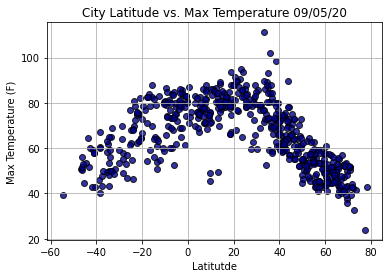

In [15]:
import time
# scatter plot of latitude vs Max Temperature

fig, ax = plt.subplots()
ax.scatter(lats, 
           max_temps, 
           color="darkblue", 
           edgecolor = 'black', 
           linewidths=1, 
           marker='o',
           alpha=0.8, 
           label='Cities')
plt.title('City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel("Latitutde")
plt.grid()
plt.savefig('weather_data/Fig1.png')
plt.show()

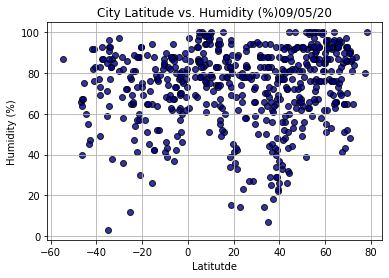

In [16]:
# scatter plot of latitude vs Humidity

fig, ax = plt.subplots()
ax.scatter(lats, 
           humidity, 
           color="darkblue", 
           edgecolor = 'black', 
           linewidths=1, 
           marker='o',
           alpha=0.8, 
           label='Cities')
plt.title('City Latitude vs. Humidity (%)' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel("Latitutde")
plt.grid()
plt.savefig('weather_data/Fig2.png')
plt.show()

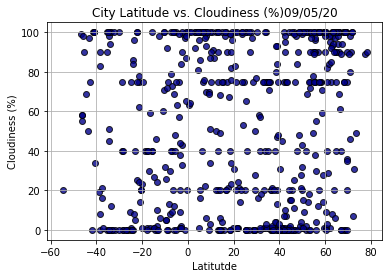

In [17]:
# scatter plot of latitude vs Cloudiness

fig, ax = plt.subplots()
ax.scatter(lats, 
           cloudiness, 
           color="darkblue", 
           edgecolor = 'black', 
           linewidths=1, 
           marker='o',
           alpha=0.8, 
           label='Cities')
plt.title('City Latitude vs. Cloudiness (%)' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitutde")
plt.grid()
plt.savefig('weather_data/Fig3.png')
plt.show()

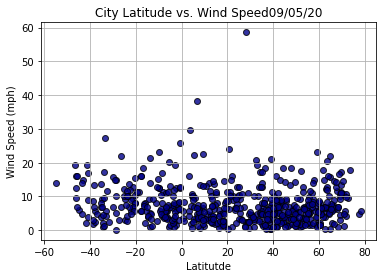

In [18]:
# scatter plot of latitude vs wind speed
fig, ax = plt.subplots()
ax.scatter(lats, 
           wind_speed, 
           color="darkblue", 
           edgecolor = 'black', 
           linewidths=1, 
           marker='o',
           alpha=0.8, 
           label='Cities')
plt.title('City Latitude vs. Wind Speed' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel("Latitutde")
plt.grid()
plt.savefig('weather_data/Fig4.png')
plt.show()

In [19]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [20]:
# Perform linear regression.
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create a hemisphere dataframe 

northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

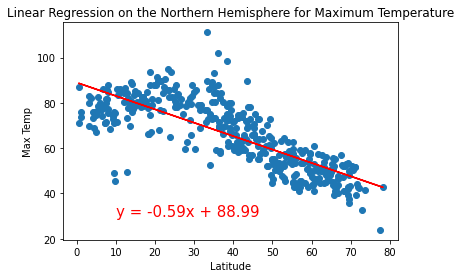

LinregressResult(slope=-0.5919039044644029, intercept=88.98834884257707, rvalue=-0.7888973927015827, pvalue=4.3131630891182025e-88, stderr=0.022854566789782715)


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,30))
print(linregress(x_values, y_values))

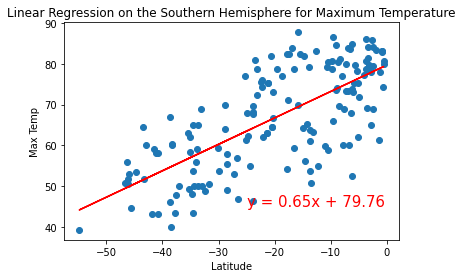

LinregressResult(slope=0.6505841016196208, intercept=79.76028016582958, rvalue=0.7159758465734732, pvalue=2.775597566198186e-26, stderr=0.05062773178693505)


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,45))
print(linregress(x_values, y_values))

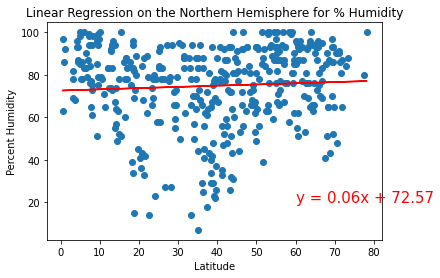

LinregressResult(slope=0.05704311865008983, intercept=72.5707515305948, rvalue=0.05976637222337023, pvalue=0.22778696264193757, stderr=0.04722501652029342)


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', 'Percent Humidity',(60,20))
print(linregress(x_values, y_values))

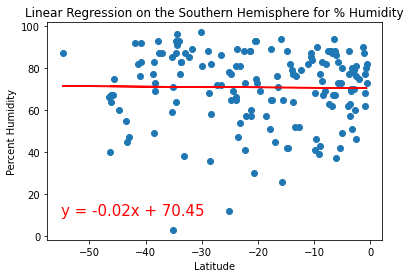

LinregressResult(slope=-0.01732294238632027, intercept=70.4502647959311, rvalue=-0.013703940255091824, pvalue=0.8638740865320518, stderr=0.10087547542599368)


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', 'Percent Humidity',(-55, 10,))
print(linregress(x_values, y_values))

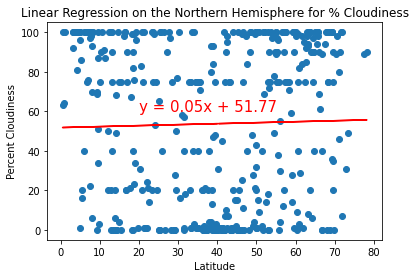

LinregressResult(slope=0.0495702279589531, intercept=51.773224846143904, rvalue=0.02464398584136059, pvalue=0.6192286162425357, stderr=0.09967376003580897)


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Percent Cloudiness',(20,60))
print(linregress(x_values, y_values))

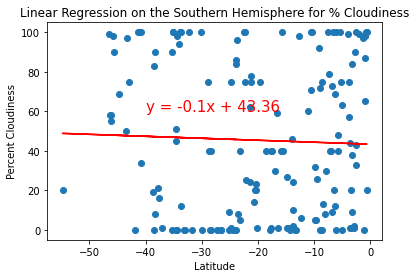

LinregressResult(slope=-0.09986451677001455, intercept=43.36066368382855, rvalue=-0.036014132705860555, pvalue=0.6522172613148287, stderr=0.22116000520277074)


In [27]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', 'Percent Cloudiness', (-40,60))
print(linregress(x_values, y_values))

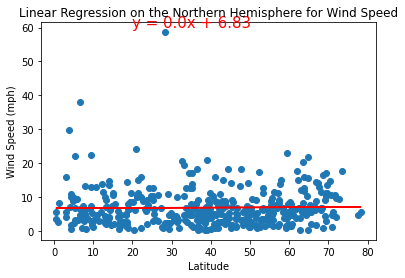

LinregressResult(slope=0.00435066047479686, intercept=6.830945232811399, rvalue=0.015578287490568894, pvalue=0.753440379801672, stderr=0.013841576873413534)


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(20,60))
print(linregress(x_values, y_values))

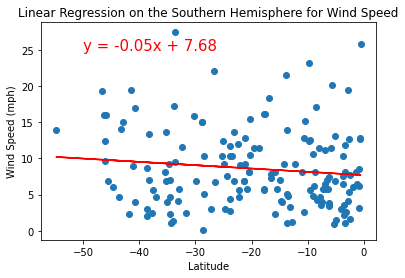

LinregressResult(slope=-0.045857958221704666, intercept=7.676347954825598, rvalue=-0.11739343522462689, pvalue=0.14056352573300532, stderr=0.030960481853668138)


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)',(-50,25))
print(linregress(x_values, y_values))